In [34]:
import subprocess
filelist = !ls -1 /Users/iwatano/Desktop/tmp_PRESUME/in/testdata_csv
inmother="/Users/iwatano/Desktop/tmp_PRESUME/in/testdata_csv"
outmother="/Users/iwatano/Desktop/tmp_PRESUME/out"
for file in filelist:
    infile = inmother+"/"+file
    outfile = outmother+"/"+file
    outfile = outfile.split(".")[0]
    print(infile,"\n",outfile)
    command = "python3 /Users/iwatano/Desktop/PRESUME/PRESUME.py -n 1000 --homoplasy {0} --output {1} --polyC --seed 0".format(infile, outfile)
    !$command
    command2 = "gunzip {0}/PRESUMEout/PRESUMEout.fa.gz".format(outfile)
    !$command2



t_prob_17

######     ######     #######     #####     #     #    #     #    #######
#     #    #     #    #          #     #    #     #    ##   ##    #
#     #    #     #    #          #          #     #    # # # #    #
######     ######     #####       #####     #     #    #  #  #    #####
#          #   #      #                #    #     #    #     #    #
#          #    #     #          #     #    #     #    #     #    #
#          #     #    #######     #####      #####     #     #    #######

Version:     1.0.0
Last update: April 24, 2020
GitHub:      https://github.com/yachielab/PRESUME

Number of generated sequences reached 1000
Generating a FASTA file...
Generating a Newick file......

Simulation end time point:         20.167800097151805
Number of generated sequences:     1024
Seed for random number generation: 0

/Users/iwatano/Desktop/tmp_PRESUME/in/testdata_csv/test_prob_18.csv 
 /Users/iwatano/Desktop/tmp_PRESUME/out/test_prob_18

######     ######     #######     #####  

In [48]:
from Bio import SeqIO
import numpy as np
import csv

data = [] #[filename, dist]
for file in filelist:
    infile = inmother+"/"+file
    outfile = outmother+"/"+file
    outfile = outfile.split(".")[0]
    fasta = outfile+"/PRESUMEout/PRESUMEout.fa"
    with open(fasta, "rU") as fh:
        p_dists = np.array([0 for i in range(31)])
        cnt = 0
        for seq_record in SeqIO.parse(fh, "fasta"):
            cnt += 1
            dist = []
            for i in range(len(seq_record.seq)):
                if seq_record.seq[i] == "C":
                    dist.append(0)
                else:
                    dist.append(1)

            p_dists = p_dists + np.array(dist)
        p_dists = np.array(p_dists) / cnt
        data.append([fasta,p_dists])
        with open("{}/PRESUMEout/prob_dist.csv".format(outfile), "w") as f:
            writer = csv.writer(f)
            index_row = ["type_of_mutation"] + [i for i in range(len(p_dists))]
            writer.writerow(index_row) 
            row = ["CT"] + list(p_dists)
            writer.writerow(row)
    

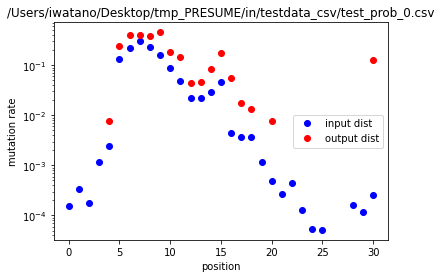

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import csv

ref = "/Users/iwatano/Desktop/tmp_PRESUME/in/testdata_csv/test_prob_0.csv"
qry = "/Users/iwatano/Desktop/tmp_PRESUME/out/test_prob_0/PRESUMEout/prob_dist.csv"

with open(ref) as f:
    _ = next(csv.reader(f))
    for row in csv.reader(f):
        ref_data = row[1:]
        ref_data = [float(i) for i in ref_data]

with open(qry) as f:
    _ = next(csv.reader(f))
    for row in csv.reader(f):
        qry_data = row[1:]
        qry_data = [float(i) for i in qry_data]
        qry_data = np.array(qry_data) / sum(qry_data)

x_ax = [i for i in range(len(qry_data))]

fig, ax = plt.subplots()
ax.plot(x_ax, ref_data,'o', color='blue', label="input dist")
ax.plot(x_ax, qry_data,'o', color='red', label="output dist")
ax.set_title(ref)
ax.set_xlabel("position")
ax.set_ylabel("mutation rate")
ax.set_yscale('log')
ax.legend()



In [67]:
type(ref_data[1])

str